# Aggregating benchmark runs

In [19]:
import pathlib
import typing

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from labm8 import pbutil
from labm8 import viz
from labm8 import labdate
from labm8 import labtypes
from labm8 import prof

from datasets.benchmarks.gpgpu import gpgpu_pb2

In [2]:
LOGDIR = pathlib.Path('/var/phd/shared/datasets/benchmarks/gpgpu/logs')
assert LOGDIR.is_dir()
!echo $(ls {LOGDIR} | wc -l) files

11371 files


In [20]:
def KernelInvocationToRow(log: gpgpu_pb2.GpgpuBenchmarkRun, ki: gpgpu_pb2.OpenClKernelInvocation):
    return {
        'date': labdate.DatetimeFromMillisecondsTimestamp(log.ms_since_unix_epoch),
        'suite': log.benchmark_suite,
        'benchmark': log.benchmark_name,
        'dataset': log.dataset_name,
        'device': log.device.device_name,
        'kernel': ki.kernel_name,
        'global_size': ki.global_size,
        'local_size': ki.local_size,
        'runtime_ms': ki.runtime_ms,
        'transferred_bytes': ki.transferred_bytes,
    }

def LogsToTable(logs: typing.Iterator[gpgpu_pb2.GpgpuBenchmarkRun]):
    rows = []
    for log in logs:
        rows += [KernelInvocationToRow(log, ki) for ki in log.kernel_invocation]
    return pd.DataFrame(rows, columns=[
        'date',
        'suite',
        'benchmark',
        'dataset',
        'device',
        'kernel',
        'global_size',
        'local_size',
        'runtime_ms',
        'transferred_bytes',
    ])

with prof.ProfileToStdout():
    df = LogsToTable(pbutil.FromFile(log, gpgpu_pb2.GpgpuBenchmarkRun())
                     for log in LOGDIR.iterdir())
df

completed in 477.271 seconds (started 7 minutes ago)


,date,suite,benchmark,dataset,device,kernel,global_size,local_size,runtime_ms,transferred_bytes
0,2019-02-10 14:26:57.838,amd-app-sdk-3.0,MatrixTranspose,default,GeForce GTX 1080,matrixTranspose,256,256,0.043136,32768
1,2019-02-10 14:30:30.411,amd-app-sdk-3.0,BinomialOption,default,GeForce GTX 1080,binomial_options,16320,255,0.110976,2048
2,2019-02-10 15:05:32.999,amd-app-sdk-3.0,FastWalshTransform,default,GeForce GTX 1080,fastWalshTransform,512,256,0.041312,4096
3,2019-02-10 15:05:32.999,amd-app-sdk-3.0,FastWalshTransform,default,GeForce GTX 1080,fastWalshTransform,512,256,0.033088,4096
4,2019-02-10 15:05:32.999,amd-app-sdk-3.0,FastWalshTransform,default,GeForce GTX 1080,fastWalshTransform,512,256,0.032064,4096
5,2019-02-10 15:05:32.999,amd-app-sdk-3.0,FastWalshTransform,default,GeForce GTX 1080,fastWalshTransform,512,256,0.032768,4096
6,2019-02-10 15:05:32.999,amd-app-sdk-3.0,FastWalshTransform,default,GeForce GTX 1080,fastWalshTransform,512,256,0.032480,4096
7,2019-02-10 15:05:32.999,amd-app-sdk-3.0,FastWalshTransform,default,GeForce GTX 1080,fastWalshTransform,512,256,0.032512,4096
8,2019-02-10 15:05:32.999,amd-app-sdk-3.0,FastWalshTransform,default,GeForce GTX 1080,fastWalshTransform,512,256,0.032128,4096
9,2019-02-10 15:05:32.999,amd-app-sdk-3.0,FastWalshTransform,default,GeForce GTX 1080,fastWalshTransform,512,256,0.032000,4096


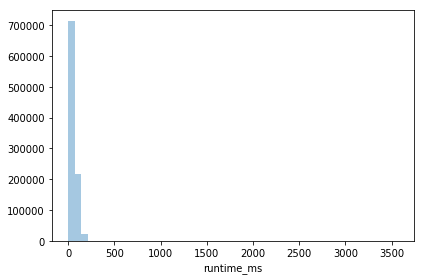

In [9]:
sns.distplot(df.runtime_ms, kde=False)
viz.Finalize()

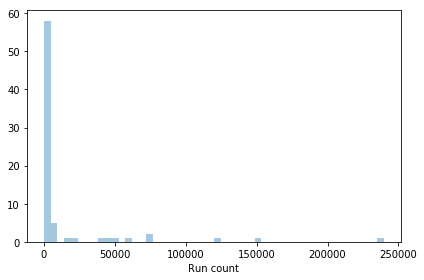

In [10]:
num_runs = df.groupby(['suite', 'benchmark', 'kernel', 'dataset']).count()['runtime_ms']
sns.distplot(num_runs, kde=False)
plt.xlabel('Run count')
viz.Finalize()

In [11]:
# Sanity check that features are the same across runs.
# TODO(cec): Do we care about global and local sizes being consistent?

def ColumnIsConstantAcrossRuns(df, col):
    """Check that column is consistent across all runs from all devices."""
    mins = df.groupby(['suite', 'benchmark', 'kernel', 'dataset', 'global_size', 'local_size']).min()[col]
    maxs = df.groupby(['suite', 'benchmark', 'kernel', 'dataset', 'global_size', 'local_size']).max()[col]
    mean = (mins == maxs).mean()
    if mean != 1:
        print(f'{mean:.1%} of {col} values are constant')
    return mean == 1

assert ColumnIsConstantAcrossRuns(df, 'transferred_bytes')

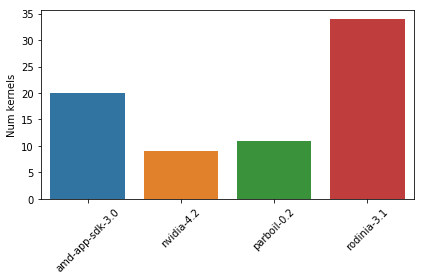

In [13]:
sns.barplot(x='suite', y='global_size', 
            data=df.groupby(['suite', 'benchmark', 'kernel', 'dataset']).mean().groupby(['suite']).count().reset_index())
plt.ylabel('Num kernels')
viz.RotateXLabels(45)
plt.xlabel('')
viz.Finalize()

In [18]:
df.groupby(['suite', 'benchmark', 'kernel', 'dataset', 'device_type']).mean()

,,,,,global_size,local_size,runtime_ms,transferred_bytes
suite,benchmark,kernel,dataset,device_type,,,,


In [ ]:
# Averages (only the runtime_ms field is averaged, everything else is constant)
df.groupby(['suite', 'benchmark', 'kernel', 'dataset', 'device_type', 'global_size', 'local_size']).mean()